In [38]:
import math
import matplotlib.pyplot as plt

In [40]:
# constants
m=1 #(kg) pumpkin
C_d=0.45 # sphere
#C_d=1e-19 # turned off
rho_air=1.2 # (kg/m^3)
r=6*0.0254 # (m) radius
A=math.pi*r**2 # (m^2) sphere
g=9.8 # (N/kg) Earth's surface

v0=-1e-12 # not zero to avoid divergence
h0=40 # (m) initial height 
t=0
dt=1e-3 # (s)

#v=v0
#F = -m*g + 0.5*C_d*rho_air*A*v*v*(-1.0*v/abs(v)) # the last bit is a unit vector so that air resistance points against velocity

In [42]:
# compute terminal velocity
# f_net=0 means mg = F_air, solve for v
v_terminal = math.sqrt(m*g/(0.5*C_d*rho_air*A))
print("terminal velocity = %.2f (m/s)"%v_terminal)

terminal velocity = 22.30 (m/s)


In [44]:
t=0
v=v0
y=h0
t_limit=60 # (s) stop simulation after this time
v_s=[]
y_s=[]
t_s=[]
KE_s=[]
Ug_s=[]
Etot_s=[]

# repeat DiffEq solver procedure many many times to get an approximate model for the motion
while (y>0 and t<t_limit) :
    
    # compute force
    F = -m*g + 0.5*C_d*rho_air*A*v*v*(-1.0*v/abs(v)) # the last bit is a unit vector so that aire resistance points against velocity

    # apprimately solve differential equation over a very short time interval
    # sometimes, this is called an "Euler" method
    a = F/m
    v2 = v + a*dt
    y2 = y + v*dt

    # store the current dynamic values
    v_s.append(v)
    y_s.append(y)
    t_s.append(t)
    KE_s.append(0.5*m*v*v)
    Ug_s.append(m*g*y)
    Etot_s.append(0.5*m*v*v+m*g*y)
    
    # update/recycle values for the next loop
    t = t + dt
    v = v2
    y = y2
    

In [76]:
import matplotlib.pyplot as plt
N=100
tfake=[]
vfake=[]
v_tanh=[] # this is the analytical solution from Mathematica
aa=0.5*C_d*rho_air*A
k=aa/m
for i in range(N):
    tf=i*3/N
    tfake.append(tf)
    vfake.append(-tf*g+v0)
    v_tanh.append((-(g/k)**2)*math.tanh(tf*((g*k)**2)))

Text(0, 0.5, 'velocity, v (m/s)')

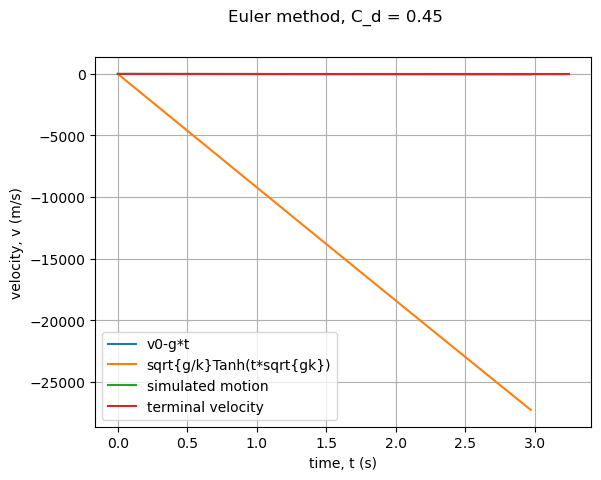

In [64]:
fig, axs = plt.subplots(1,1)
fig.suptitle("Euler method, C_d = %.2f"%C_d)
plt.plot(tfake,vfake,label="v0-g*t")
plt.plot(tfake,v_tanh,label="sqrt{g/k}Tanh(t*sqrt{gk})")
plt.plot(t_s,v_s,label="simulated motion")
plt.plot([min(t_s),max(t_s)],[-v_terminal,-v_terminal],label="terminal velocity")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("velocity, v (m/s)")


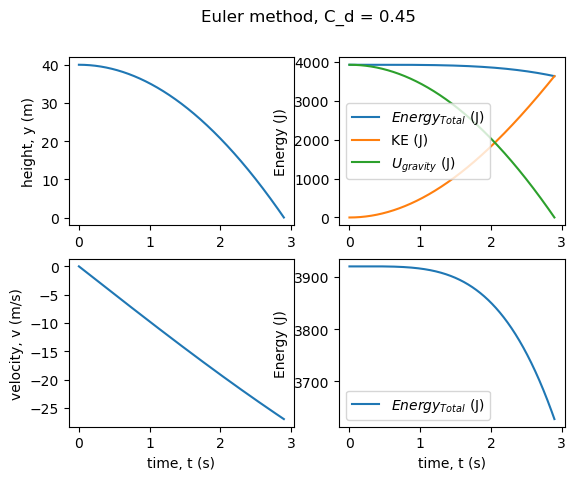

In [9]:
#Following this example for plots
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2,2)
fig.suptitle("Euler method, C_d = %.2f"%C_d)
axs[0,0].plot(t_s,y_s)
axs[0,0].set( ylabel='height, y (m)')

axs[1,0].plot(t_s,v_s)
axs[1,0].set(xlabel='time, t (s)', ylabel='velocity, v (m/s)')

axs[0,1].plot(t_s,Etot_s,label="$Energy_{Total}$ (J)")
axs[0,1].plot(t_s,KE_s,label="KE (J)")
axs[0,1].plot(t_s,Ug_s,label="$U_{gravity}$ (J)")
axs[0,1].set(ylabel='Energy (J)')
axs[0,1].legend()

axs[1,1].plot(t_s,Etot_s,label="$Energy_{Total}$ (J)")
axs[1,1].set(xlabel='time, t (s)', ylabel='Energy (J)')
axs[1,1].legend()


Text(0, 0.5, 'System Energy Gain (J)')

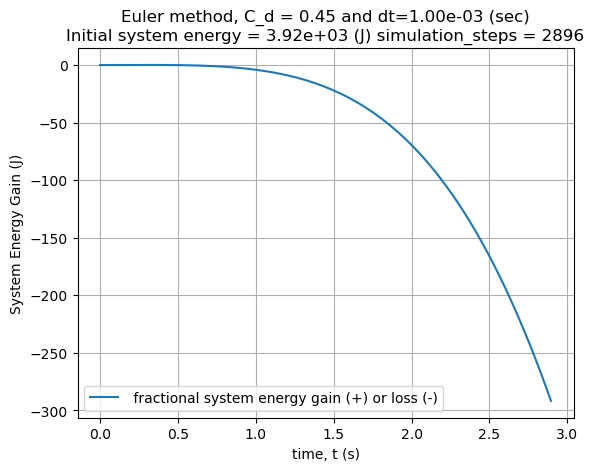

In [10]:
import matplotlib.pyplot as plt
N=100
dE=[]
pE=[]
for i in range(len(Etot_s)):
    dE.append(Etot_s[i]-Etot_s[0])
    pE.append((Etot_s[i]-Etot_s[0])/Etot_s[0])

plt.title("Euler method, C_d = %.2f and dt=%.2e (sec)\nInitial system energy = %.2e (J) simulation_steps = %d"%(C_d,dt,Etot_s[0],len(Etot_s)))
plt.plot(t_s,dE,label=" fractional system energy gain (+) or loss (-)")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("System Energy Gain (J)")


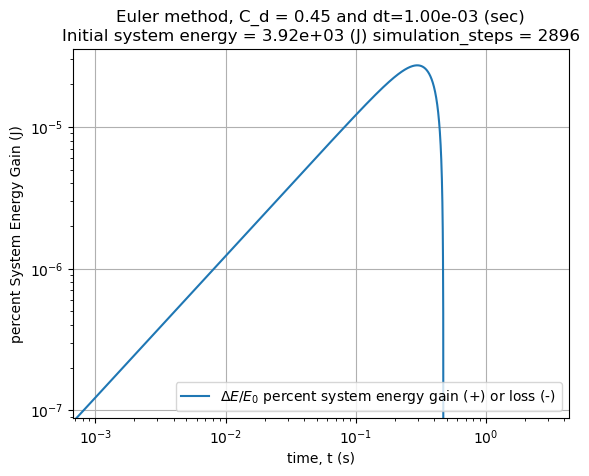

In [12]:
import matplotlib.pyplot as plt
N=100
dE=[]
pE=[]
for i in range(len(Etot_s)):
    dE.append(Etot_s[i]-Etot_s[0])
    pE.append((Etot_s[i]-Etot_s[0])/Etot_s[0])

plt.title("Euler method, C_d = %.2f and dt=%.2e (sec)\nInitial system energy = %.2e (J) simulation_steps = %d"%(C_d,dt,Etot_s[0],len(Etot_s)))
plt.plot(t_s,pE,label="$\\Delta E/E_0$ percent system energy gain (+) or loss (-)")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("percent System Energy Gain (J)")
plt.yscale("log")
plt.xscale("log")


In [ ]:
x`